In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [66]:
#Let's start by reading in the dataset:
full_raw = pd.read_csv('./csvs/both_cleaned.csv', index_col=0)
full_raw['subreddit'] = np.where(full_raw['subreddit'] == 'UnethicalLifeProTips', 1, 0)
full_raw.reset_index(inplace=True)
full_raw.head()

,index,title,selftext,subreddit
0,0,": when packing for a move, use your clothes to...","most people will unpack the kitchen early on, ...",0
1,1,: to avoid giving clicks/views to clickbaity n...,most of the time it will give you the name of ...,0
2,2,: kindness is not weakness.,"before i go on, i hope this doesn’t get taken ...",0
3,3,: bought online and shipping delayed? check gu...,for example- i ordered several times from newe...,0
4,4,": guys, if you are on a date with a girl, shut...",(if physical attraction and all that is there ...,0


In [67]:
analyzer = SentimentIntensityAnalyzer()

In [68]:
analyzer.polarity_scores(full_raw['title'][2])

{'neg': 0.0, 'neu': 0.36, 'pos': 0.64, 'compound': 0.6522}

In [70]:
title_scores=[]
indexes_to_drop = []

for i in range(len(full_raw)):
    try:
        title_scores.append(analyzer.polarity_scores(full_raw['title'][i]))
    except:
        title_scores.append(np.nan)
        indexes_to_drop.append(i)

In [71]:
text_scores=[]

In [72]:
for i in range(len(full_raw)):
    try:
        text_scores.append(analyzer.polarity_scores(full_raw['selftext'][i]))
    except:
        text_scores.append(np.nan)
        if i in indexes_to_drop:
            pass
        else:
            indexes_to_drop.append(i)

In [28]:
title_scores

[{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.5859},
 {'neg': 0.053, 'neu': 0.889, 'pos': 0.058, 'compound': 0.0516},
 {'neg': 0.196, 'neu': 0.505, 'pos': 0.299, 'compound': 0.21},
 {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.8519},
 {'neg': 0.065, 'neu': 0.845, 'pos': 0.09, 'compound': 0.0772},
 {'neg': 0.035, 'neu': 0.965, 'pos': 0.0, 'compound': -0.0516},
 {'neg': 0.083, 'neu': 0.712, 'pos': 0.204, 'compound': 0.8479},
 {'neg': 0.087, 'neu': 0.833, 'pos': 0.08, 'compound': 0.1969},
 {'neg': 0.152, 'neu': 0.799, 'pos': 0.05, 'compound': -0.5719},
 {'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.8207},
 {'neg': 0.077, 'neu': 0.828, 'pos': 0.095, 'compound': -0.2732},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.145, 'neu': 0.727, 'pos': 0.127, 'compound': -0.2153},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.144, 'neu': 0.707, 'pos': 0.149, 'compound': 0.0516},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.

In [34]:
text_scores

[{'neg': 0.023, 'neu': 0.872, 'pos': 0.104, 'compound': 0.8372},
 {'neg': 0.175, 'neu': 0.789, 'pos': 0.036, 'compound': -0.8765},
 {'neg': 0.084, 'neu': 0.682, 'pos': 0.234, 'compound': 0.9778},
 {'neg': 0.128, 'neu': 0.81, 'pos': 0.062, 'compound': -0.9094},
 {'neg': 0.094, 'neu': 0.774, 'pos': 0.132, 'compound': 0.6464},
 {'neg': 0.051, 'neu': 0.819, 'pos': 0.131, 'compound': 0.802},
 {'neg': 0.141, 'neu': 0.792, 'pos': 0.068, 'compound': -0.9081},
 {'neg': 0.148, 'neu': 0.763, 'pos': 0.089, 'compound': 0.2602},
 {'neg': 0.074, 'neu': 0.827, 'pos': 0.099, 'compound': 0.8988},
 {'neg': 0.119, 'neu': 0.855, 'pos': 0.026, 'compound': -0.6908},
 {'neg': 0.133, 'neu': 0.79, 'pos': 0.077, 'compound': -0.7423},
 {'neg': 0.037, 'neu': 0.934, 'pos': 0.029, 'compound': 0.1352},
 {'neg': 0.066, 'neu': 0.854, 'pos': 0.08, 'compound': 0.2714},
 {'neg': 0.06, 'neu': 0.803, 'pos': 0.137, 'compound': 0.9247},
 {'neg': 0.053, 'neu': 0.769, 'pos': 0.178, 'compound': 0.9913},
 {'neg': 0.065, 'neu': 0.

In [73]:
len(indexes_to_drop)

33

In [74]:
import missingno as msno

In [57]:
type(title_scores)

list

In [75]:
full_raw['title_scores'] = title_scores
full_raw['text_scores'] = text_scores

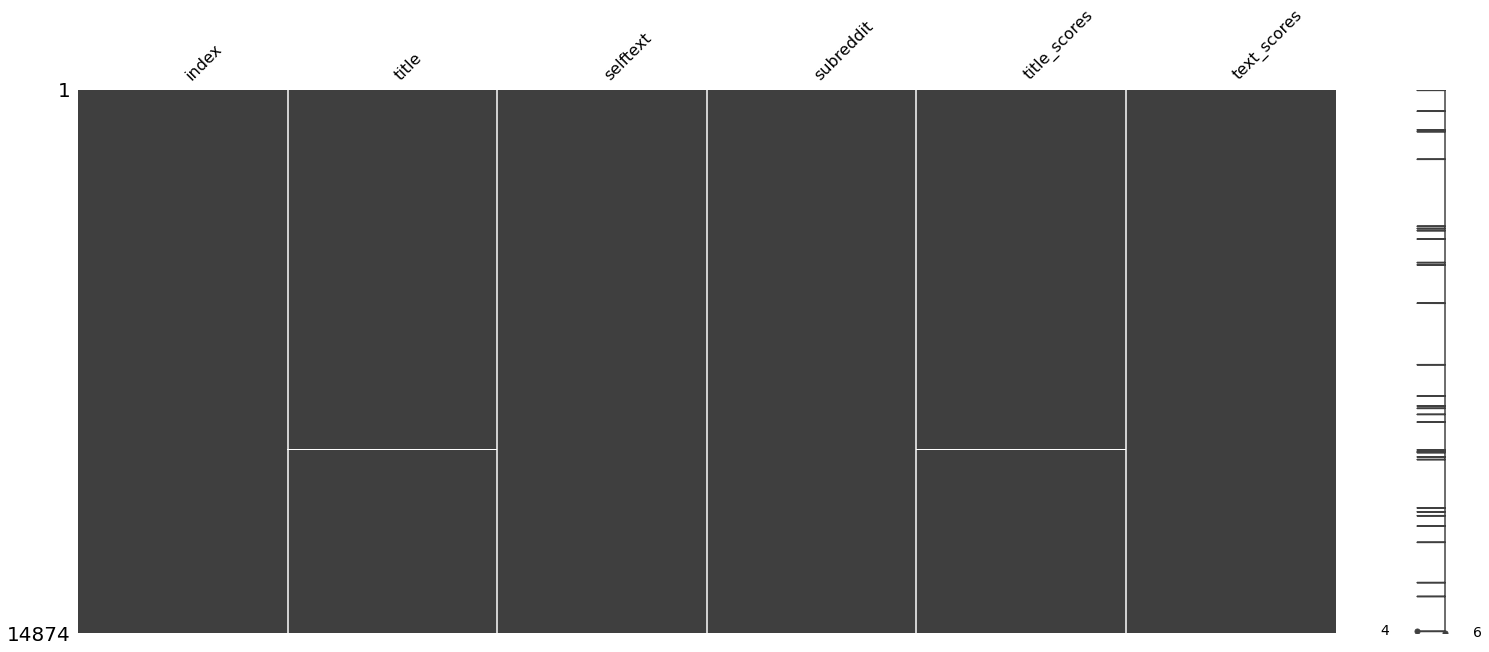

In [76]:
msno.matrix(full_raw)

In [77]:
full_raw.dropna(inplace=True)

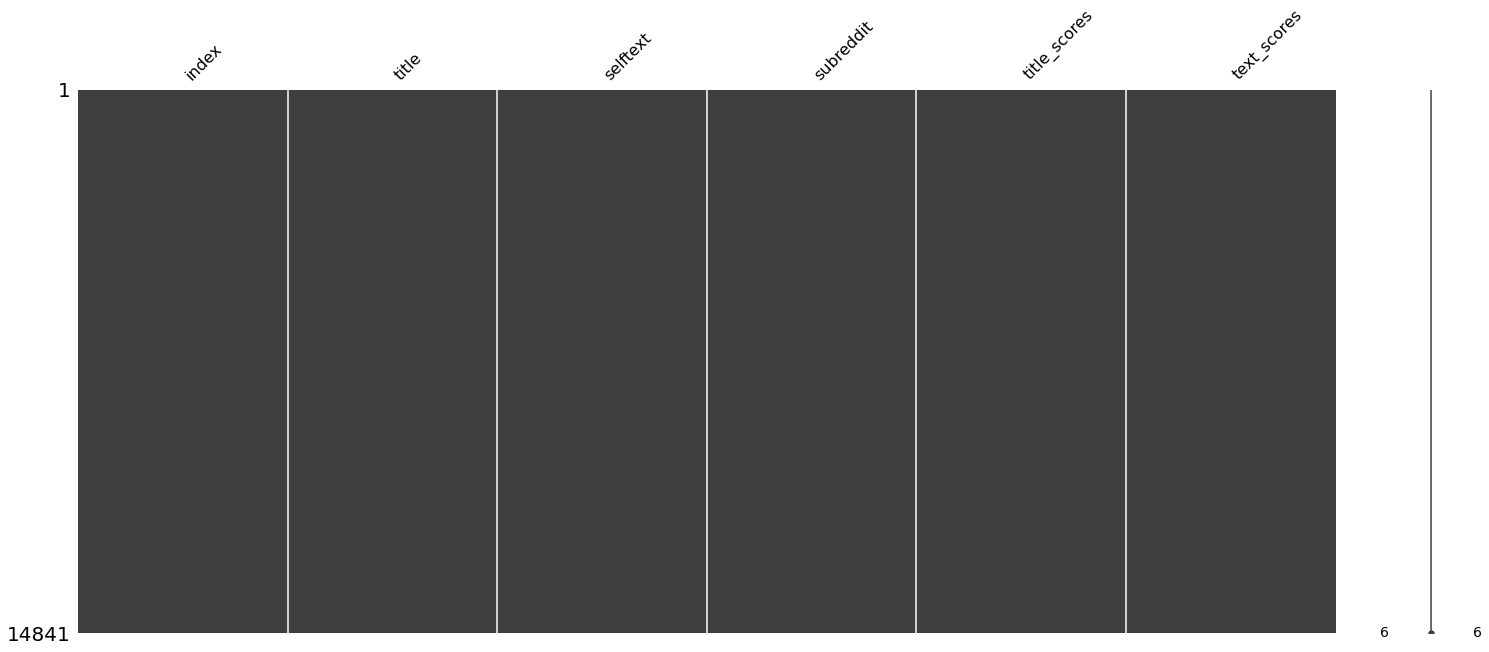

In [78]:
msno.matrix(full_raw)

In [79]:
import matplotlib.pyplot as plt

In [80]:
from mpl_toolkits import mplot3d

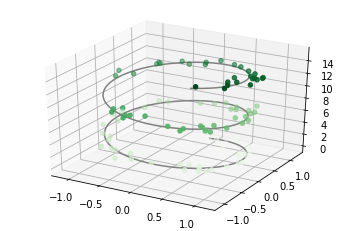

In [81]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
#Going to make use of this to plot vader sentiment scores
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [88]:
(analyzer.polarity_scores(full_raw['title'][0][0])).keys()

dict_keys(['neg', 'neu', 'pos', 'compound'])

In [90]:
analyzer.polarity_scores(full_raw['title'][0][0])['neu']

1.0

In [93]:
full_raw['title_scores'][0]['neu']

1.0

In [96]:
full_raw.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14864, 14865, 14866, 14867, 14868, 14869, 14870, 14871, 14872,
            14873],
           dtype='int64', length=14841)

In [112]:
title_neg=[]
title_neu=[]
title_pos=[]
title_comp=[]
for i in full_raw.index:
    title_neg.append(full_raw['title_scores'][i]['neg'])
    title_neu.append(full_raw['title_scores'][i]['neu'])
    title_pos.append(full_raw['title_scores'][i]['pos'])
    title_comp.append(full_raw['title_scores'][i]['compound'])
    

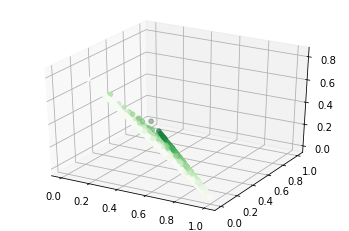

In [115]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = title_neg
xdata = title_neu
ydata = title_pos

ax.scatter3D(xdata, ydata, zdata, c= ydata, cmap = 'Greens');

In [105]:
min(xdata)

1.0

In [106]:
max(xdata)

1.0

In [110]:
full_raw['pos'].describe()

count    14841.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: pos, dtype: float64

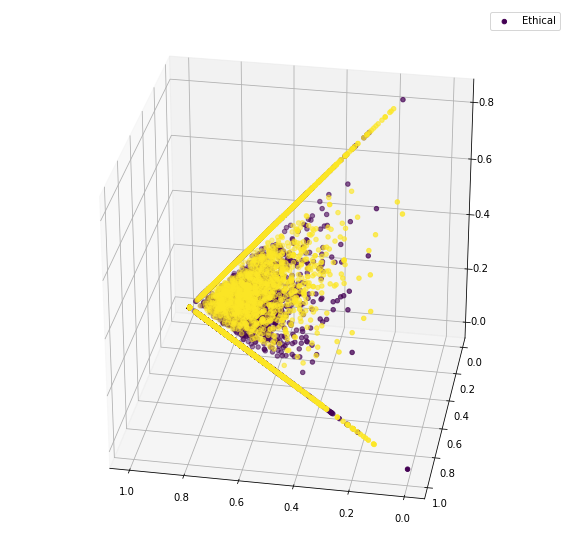

In [148]:
#https://matplotlib.org/gallery/mplot3d/rotate_axes3d.html

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = xdata, ydata, zdata
ax.scatter3D(X, Y, Z, c=full_raw['subreddit'])

ax.view_init(elev = 30, azim=100)
plt.legend(labels=['Ethical', 'Unethical'])


(array([1.000e+00, 8.000e+00, 3.700e+01, 1.230e+02, 2.700e+02, 6.950e+02,
        1.598e+03, 2.724e+03, 3.416e+03, 5.969e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

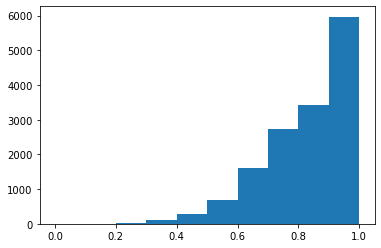

In [149]:
plt.hist(X)

(array([9.281e+03, 2.870e+03, 1.617e+03, 6.500e+02, 2.390e+02, 1.040e+02,
        5.800e+01, 1.600e+01, 5.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

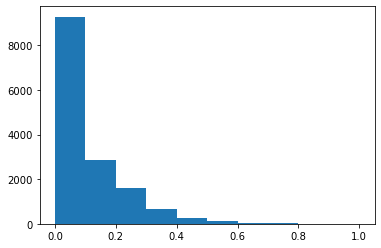

In [150]:
plt.hist(Y)

(array([1.0215e+04, 2.0900e+03, 1.3080e+03, 6.2500e+02, 3.2300e+02,
        1.6600e+02, 6.5000e+01, 3.0000e+01, 1.2000e+01, 7.0000e+00]),
 array([0.    , 0.0821, 0.1642, 0.2463, 0.3284, 0.4105, 0.4926, 0.5747,
        0.6568, 0.7389, 0.821 ]),
 <a list of 10 Patch objects>)

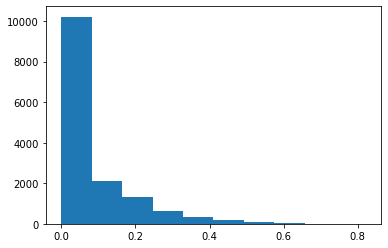

In [151]:
plt.hist(Z)